# Обработка изображения с шумами 
## random ИЛИ соль+перец ИЛИ оба пространственными фильтрами

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from lib.helpersmd import readFromDat
%matplotlib notebook

In [2]:
import numpy as np
import os
import cv2
def noisy(image):
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.0004
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[coords] = 0
    return out

In [3]:
def medianFilter(model,startx,endx,starty,endy):
    block=model[startx:endx,starty:endy].flatten()
    block=np.sort(block)
    return block[block.shape[0]/2]
def meanFilter(model,startx,endx,starty,endy):
    block=model[startx:endx,starty:endy].flatten()
    return block.mean()

## 1. Explore Original Image

<IPython.core.display.Javascript object>


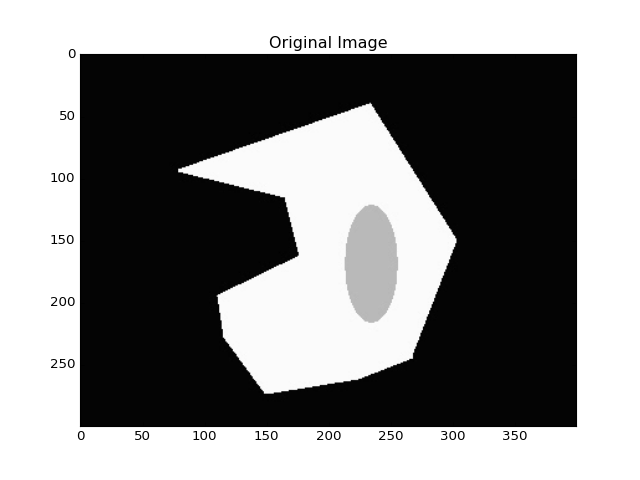

In [4]:
from PIL import Image
model = np.array(Image.open("./data/MODEL.jpg"))
model = (model-model.min())
size=model.shape
plt.figure()
plt.title('Original Image')
imshow(model,cmap='gray')

## 2. Add Random Noise

<IPython.core.display.Javascript object>


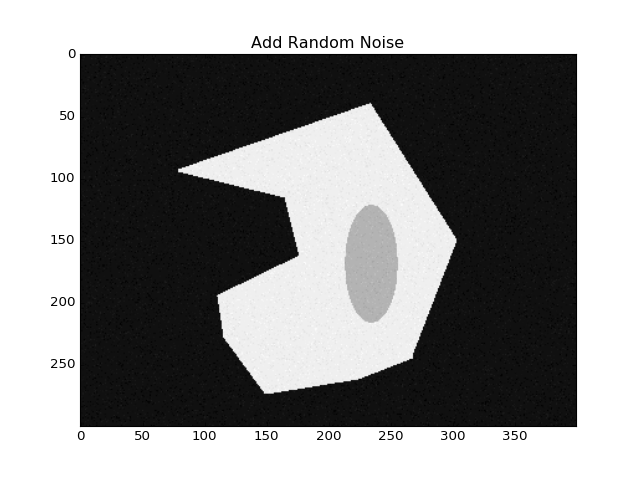

In [5]:
prob=np.random.randint(0,100,size)<20
ns=np.multiply(prob,np.random.randint(-10,10,size))
noiseimg1=model+ns
plt.figure()
plt.title('Add Random Noise')
imshow(noiseimg1,cmap='gray')

### 2.1 Process with Median Filter

<IPython.core.display.Javascript object>


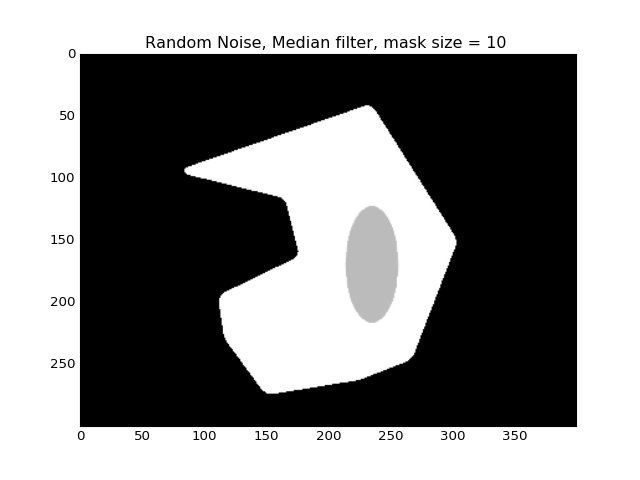

In [6]:
mask_size=10
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=medianFilter(noiseimg1,startx,endx,starty,endy)
plt.figure()
plt.title("Random Noise, Median filter, mask size = {} ".format(mask_size))
imshow(newimg,cmap='gray')

### 2.2 Process with Mean Filter

<IPython.core.display.Javascript object>


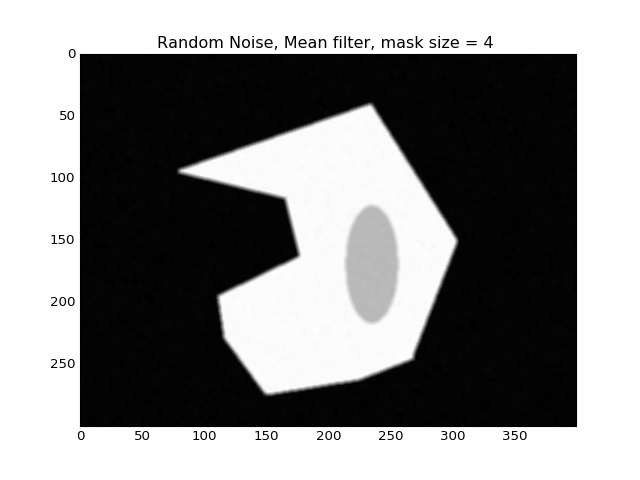

In [7]:
mask_size=4
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=meanFilter(noiseimg1,startx,endx,starty,endy)
plt.figure()
plt.title("Random Noise, Mean filter, mask size = {} ".format(mask_size))
imshow(newimg,cmap='gray')

## 3. Add Salt-pepper Noise

<IPython.core.display.Javascript object>


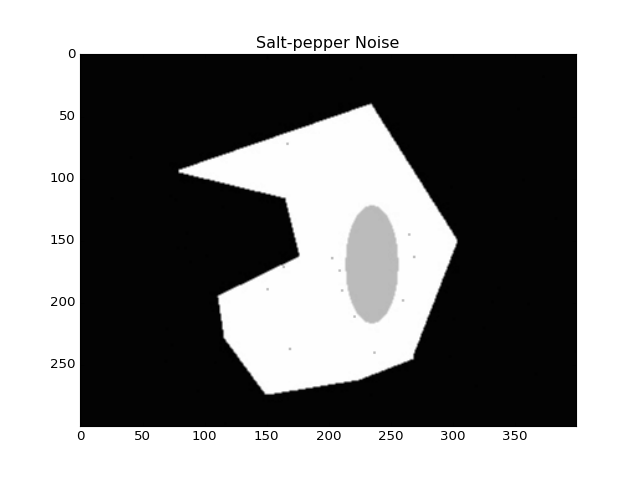

In [8]:
#prob=np.random.randint(0,100,size)
noiseimg2=noisy(model)
plt.figure()
plt.title("Salt-pepper Noise".format(mask_size))
imshow(noiseimg2,cmap='gray')

### 3.1 Process with Median Filter

In [9]:
mask_size=10
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=medianFilter(noiseimg2,startx,endx,starty,endy)
imshow(newimg,cmap='gray')

### 3.2 Process with Mean Filter

In [10]:
mask_size=3
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=meanFilter(noiseimg2,startx,endx,starty,endy)
imshow(newimg,cmap='gray')

## 4. Add Random noise + Salt-pepper Noise

<IPython.core.display.Javascript object>


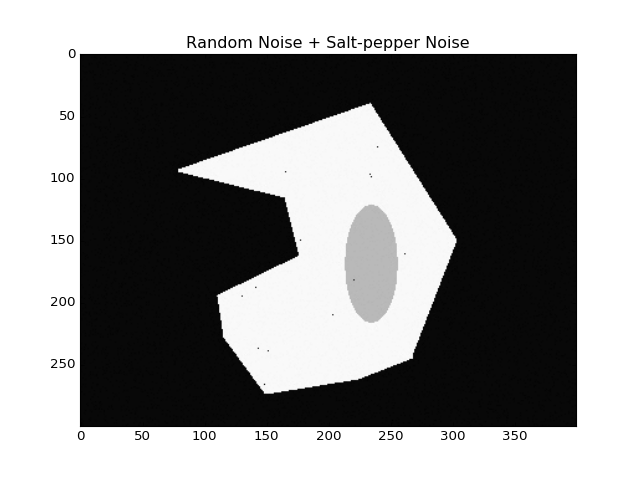

In [11]:
prob=np.random.randint(0,100,size)<20
ns=np.multiply(prob,np.random.randint(-2,2,size))
noiseimg3=noisy(model)+ns
plt.figure()
plt.title("Random Noise + Salt-pepper Noise".format(mask_size))
imshow(noiseimg3,cmap='gray')

### 4.1 Process with Median Filter

<IPython.core.display.Javascript object>


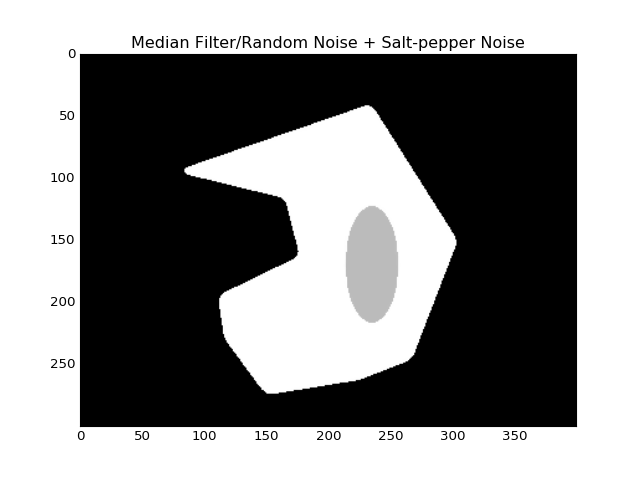

In [12]:
mask_size=10
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=medianFilter(noiseimg3,startx,endx,starty,endy)
plt.figure()
plt.title("Median Filter/Random Noise + Salt-pepper Noise".format(mask_size))
imshow(newimg,cmap='gray')

### 4.2 Process with Mean Filter

<IPython.core.display.Javascript object>


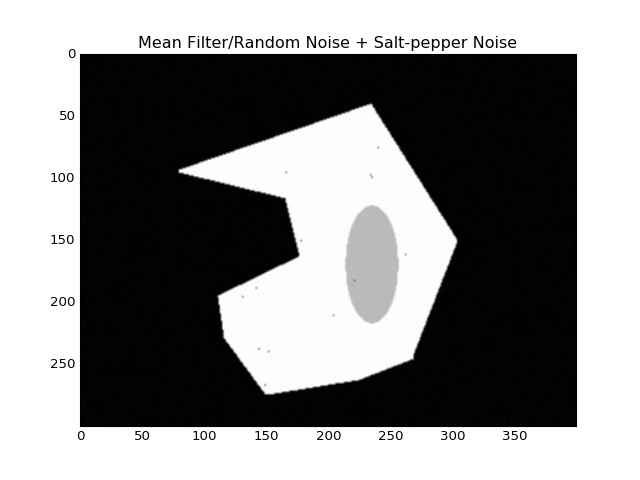

In [13]:
mask_size=3
newimg=np.zeros_like(model)
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        startx=max(0,i-mask_size/2)
        starty=max(0,j-mask_size/2)
        endx=i+mask_size/2
        endy=j+mask_size/2
        newimg[i,j]=meanFilter(noiseimg3,startx,endx,starty,endy)
plt.figure()
plt.title("Mean Filter/Random Noise + Salt-pepper Noise".format(mask_size))
imshow(newimg,cmap='gray')